In [79]:
from pathlib import Path
from rosbags.highlevel import AnyReader
import numpy as np

data = np.empty((0,10))
folderpath = "C:\\Users\\DANG THE HUNG\\OneDrive - King's College London\\Msc study\\7MBI0101 - Advanced robotics\\Code\\rosbag2_2024_02_06-15_56_13"
# create reader instance and open for reading
with AnyReader([Path(folderpath)]) as reader:
    connections = [x for x in reader.connections if x.topic == '/joint_state']
    # print(reader.connections[0].topic)
    # print(reader.connections[1].topic)
    # print(reader.connections[2].topic)
    # print(reader.connections[3].topic)
    # print(connections)
    for connection, timestamp, rawdata in reader.messages(connections=connections):
        #  print(timestamp)
         msg = reader.deserialize(rawdata, connection.msgtype)
         data = np.append(data, np.insert(msg.data, 0, timestamp).reshape(1,-1), axis=0)
        #  print(msg. header.frame_id)




In [28]:
from pathlib import Path
from rosbags.highlevel import AnyReader
import numpy as np

data = np.empty((0,3))
folderpath = "C:\\Users\\DANG THE HUNG\\OneDrive - King's College London\\Msc study\\7MBI0101 - Advanced robotics\\Code\\rosbag2_2024_02_06-16_21_45"
# create reader instance and open for reading
with AnyReader([Path(folderpath)]) as reader:
    connections = [x for x in reader.connections if x.topic == '/joint_state']
    # print(reader.connections[0].topic)
    # print(reader.connections[1].topic)
    # print(reader.connections[2].topic)
    # print(reader.connections[3].topic)
    # print(connections)
    for connection, timestamp, rawdata in reader.messages(connections=connections):
        #  print(timestamp)
        msg = reader.deserialize(rawdata, connection.msgtype)
        # print(timestamp)
        print(msg.data)
        data = np.append(data, np.insert(msg.data[1:3], 0, timestamp).reshape(1,-1), axis=0)
        #  print(msg. header.frame_id)




[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        3.      ]
[29.707926  0.        3.      ]
[29.707926  0.        3.      ]
[29.707926  0.        3.      ]
[29.707926  0.        1.      ]
[29.707926  0.        2.      ]
[29.707926  0.        3.      ]
[29.707926  0.        3.      ]
[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        1.      ]
[29.707926  0.        2.      ]
[29.707926  0.        1.      ]
[29.707926  0.        2.      ]
[29.707926  0.        2.      ]
[29.707926  0.        2.      ]
[29.707926  0.        3.      ]
[29.707926  0.        1.      ]
[29.707926  0.        2.      ]
[29.707926  0.        2.      ]
[29.707926  0.        2.      ]
[29.707926  0.        1.      ]
[29.707926  0.        2.      ]
[29.707926  0.        1.      ]
[29.707926  0.        4.      ]
[29.707926  0.        2.      ]
[29.7079

In [62]:
data2 = data


In [91]:
k = data[253:-1,:]
print(k)

[[ 1.70723644e+18 -8.69032478e+00 -2.10000000e+01]
 [ 1.70723644e+18 -9.29381943e+00 -2.10000000e+01]
 [ 1.70723644e+18 -9.41451836e+00 -2.10000000e+01]
 ...
 [ 1.70723658e+18  1.00180130e+01  2.10000000e+01]
 [ 1.70723658e+18  9.89731407e+00  1.90000000e+01]
 [ 1.70723658e+18  9.89731407e+00  2.10000000e+01]]


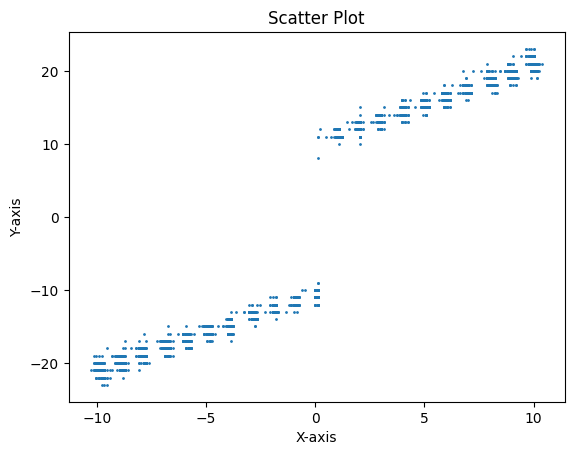

In [92]:
import matplotlib.pyplot as plt
plt.scatter(k[:,1], k[:,2], s=1)

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [93]:
data = k

In [94]:
X = data[:,1].reshape(-1, 1)
y = data[:,2]
print(X)

[[-8.69032478]
 [-9.29381943]
 [-9.41451836]
 ...
 [10.018013  ]
 [ 9.89731407]
 [ 9.89731407]]


In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

X = data[:,1].reshape(-1, 1)
y = data[:,2]

def custom_transform(x):
    transformed_x1 = x  # Transformation 1
    transformed_x2 = np.sign(x)  # Transformation 2
    return np.concatenate((transformed_x1, transformed_x2), axis=1)

# Optional variable transformation
transformer = FunctionTransformer(custom_transform)  # Apply logarithmic transformation
X_transformed = transformer.transform(X)

# Create and fit the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(X_transformed, y)
y_pred = model.predict(X_transformed)

# # Predict using the transformed variable
# x_new = np.array([6]).reshape(-1, 1)  # New input value
# x_new_transformed = transformer.transform(x_new)

# print("Predicted value:", y_pred)

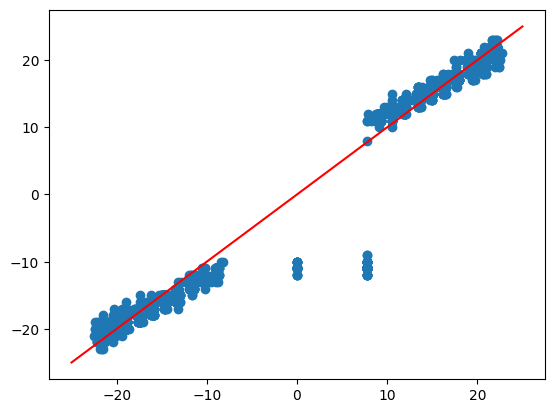

In [96]:
plt.scatter(y_pred, y)
t = np.linspace(-25, 25, 100)
yt = t

# Plot the straight line
plt.plot(t, yt, color='red')
